<a href="https://colab.research.google.com/github/Erick-Viana/alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Pré processamentos da analise


In [8]:
# inserido nome das lojas
loja['loja'] = 'loja 1'
loja2['loja'] = 'loja 2'
loja3['loja'] = 'loja 3'
loja4['loja'] = 'loja 4'

#unindo os dataframe
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
print(dados.head())

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    loja  
0    cartao_credito                       8 -22.19 -48.79  loja 1  
1    carta

In [22]:
# informações gerais
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 9435 non-null   object        
 1   Categoria do Produto    9435 non-null   object        
 2   Preço                   9435 non-null   float64       
 3   Frete                   9435 non-null   float64       
 4   Data da Compra          9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Local da compra         9435 non-null   object        
 7   Avaliação da compra     9435 non-null   int64         
 8   Tipo de pagamento       9435 non-null   object        
 9   Quantidade de parcelas  9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  loja                    9435 non-null   object  

In [23]:
# Convertendo a coluna 'Data da Compra' para tipo datetime
dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'])
print(dados['Data da Compra'].dtype)

datetime64[ns]


In [24]:
# Verificação das colunas
print(dados.columns)

# Ver quantas linhas e colunas
print(f"O dataset tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.")

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')
O dataset tem 9435 linhas e 13 colunas.


In [25]:
#Verificação de valores nulos datafrme
print(dados.isnull().values.any())

# print(dados.isnull().sum()/len(dados))*100
percentage_null = (dados.isnull().sum()/len(dados))*100
print(percentage_null)


False
Produto                   0.0
Categoria do Produto      0.0
Preço                     0.0
Frete                     0.0
Data da Compra            0.0
Vendedor                  0.0
Local da compra           0.0
Avaliação da compra       0.0
Tipo de pagamento         0.0
Quantidade de parcelas    0.0
lat                       0.0
lon                       0.0
loja                      0.0
dtype: float64


## Salvar o DataFrame limpo

In [37]:
dados.to_csv("dados_limpos.csv", index=False)

#1. Análise do faturamento


In [36]:
# Crindo coluna faturamento
dados['Faturamento'] = dados['Preço'] + dados['Frete']

# Agrupar por loja e somar o faturamento
faturamento_por_loja = dados.groupby('loja')['Faturamento'].sum().sort_values(ascending=False)

# Atribuir faturamento_por_loja a faturamento para formatação
faturamento = faturamento_por_loja
faturamento_formatado = faturamento.apply(lambda x: f'R$ {x:,.2f}')
# Exibir o resultado
print(faturamento_formatado)


loja
loja 1    R$ 1,616,347.09
loja 2    R$ 1,567,773.22
loja 3    R$ 1,542,047.69
loja 4    R$ 1,458,253.46
Name: Faturamento, dtype: object


# 2. Vendas por Categoria

In [43]:
# Agrupamento  por categoria e somar os preços
vendas_categoria = dados.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(vendas_categoria)

# Formatar o valor como moeda
vendas_categoria_formatado = vendas_categoria.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

print(vendas_categoria_formatado)

Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64
Categoria do Produto
eletronicos              R$ 2.214.099,72
eletrodomesticos         R$ 1.766.337,03
moveis                   R$ 1.010.214,00
instrumentos musicais      R$ 465.029,67
esporte e lazer            R$ 190.635,39
brinquedos                  R$ 98.140,86
utilidades domesticas       R$ 76.773,38
livros                      R$ 50.260,74
Name: Preço, dtype: object


# 3. Média de Avaliação das Lojas

🧠 Perguntas que queremos responder:
Qual loja teve a melhor média de avaliação?

Existe alguma loja com muitas avaliações ruins (ex: nota abaixo de 3)?

Há diferença significativa entre as lojas?



In [46]:
#Agrupar por loja e calcular a média das avaliações
avaliacoes_lojas = dados.groupby('loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print(avaliacoes_lojas)


loja
loja 3    4.048326
loja 2    4.037304
loja 4    3.995759
loja 1    3.976685
Name: Avaliação da compra, dtype: float64


In [47]:
# Contar quantas avaliações abaixo de 3 por loja
avaliacoes_ruins = dados[dados['Avaliação da compra'] < 3]
avaliacoes_ruins_por_loja = avaliacoes_ruins['loja'].value_counts()
print(avaliacoes_ruins_por_loja)


loja
loja 1    405
loja 4    395
loja 3    376
loja 2    366
Name: count, dtype: int64


💭 Pensamento por trás disso:
A média das avaliações nos dá uma noção geral da satisfação do cliente.

A quantidade de avaliações ruins nos alerta sobre possíveis problemas (produto, entrega, atendimento...).

Cruzando as duas análises, conseguimos saber qual loja mais desagrada e por quê.



# 4. Produtos Mais e Menos Vendidos

🎯 Objetivo da análise:
Descobrir:

Quais produtos têm maior volume de vendas?

Quais produtos vendem pouco e talvez precisem de atenção (melhoria, promoção, substituição etc.)

In [48]:
# Contar quantas vezes o produto foi vendido
vendas_produtos = dados['Produto'].value_counts()
print(vendas_produtos)

Produto
Cômoda                         210
Carrinho controle remoto       206
Micro-ondas                    206
Bateria                        203
Cama king                      201
Secadora de roupas             200
Modelagem preditiva            200
Jogo de panelas                200
Cama box                       199
Blocos de montar               199
Celular Plus X42               198
Guarda roupas                  197
Pandeiro                       197
Bola de basquete               197
Bicicleta                      196
Iniciando em programação       195
Smart TV                       192
Geladeira                      191
Lava louças                    189
Faqueiro                       189
Violão                         188
Impressora                     188
Kit banquetas                  188
Copo térmico                   187
Fogão                          187
TV Led UHD 4K                  187
Corda de pular                 186
Mesa de jantar                 185
Bola de vôle

In [49]:
# Produtos mais vendidos
print("Produtos mais vendidos:")
print(vendas_produtos.head(10))

# Produtos menos vendidos
print("\nProdutos menos vendidos:")
print(vendas_produtos.tail(10))

Produtos mais vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

Produtos menos vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [55]:
# Calclular o preço mediod de cada produto
preco_medio = dados.groupby('Produto')['Preço'].mean()
print(preco_medio)


Produto
Assistente virtual              275.189162
Bateria                         970.810099
Bicicleta                       656.368827
Blocos de montar                 45.577186
Bola de basquete                 66.051117
Bola de vôlei                    65.938696
Boneca bebê                      65.463143
Cadeira de escritório           509.018287
Cama box                        697.474472
Cama king                       900.698308
Carrinho controle remoto         95.585534
Celular ABXY                   1341.068599
Celular Plus X42               2700.682525
Ciência de dados com python      72.584699
Copo térmico                     60.587380
Corda de pular                   21.994247
Cubo mágico 8x8                  20.214889
Cômoda                          370.915857
Dashboards com Power BI          47.281105
Dinossauro Rex                   23.717314
Faqueiro                         60.390741
Fogão                           933.129358
Fone de ouvido                  126.562126
Gel

In [56]:
# Juntar as duas informações em um só DataFrame
analise_produtos = pd.DataFrame({
    'Quantidade Vendida': vendas_produtos, # Changed 'vendas_por_produto' to 'vendas_produtos'
    'Preço Médio': preco_medio
})


In [57]:
correlacao = analise_produtos['Quantidade Vendida'].corr(analise_produtos['Preço Médio'])
print(f'Correlação entre Preço Médio e Quantidade Vendida: {correlacao}')


Correlação entre Preço Médio e Quantidade Vendida: 0.14555660107951646


0.14 é positivo, então produtos mais caros tendem a vender um pouco mais, mas a relação é muito fraca.

# 5. Frete Médio por Loja


🧠 Pensamento Analítico – Etapas
1. Pergunta do negócio
Qual loja tem o maior ou menor custo médio de frete?

In [62]:
# Cálculo do frete médio por loja
frete_loja1 = loja['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

# Exibir resultados
print(f"Frete médio Loja 1: R${frete_loja1:.2f}")
print(f"Frete médio Loja 2: R${frete_loja2:.2f}")
print(f"Frete médio Loja 3: R${frete_loja3:.2f}")
print(f"Frete médio Loja 4: R${frete_loja4:.2f}")


Frete médio Loja 1: R$34.69
Frete médio Loja 2: R$33.62
Frete médio Loja 3: R$33.07
Frete médio Loja 4: R$31.28


# **VISUALIZAÇÃO GRAFICA**

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gráfico 1 – Faturamento por loja

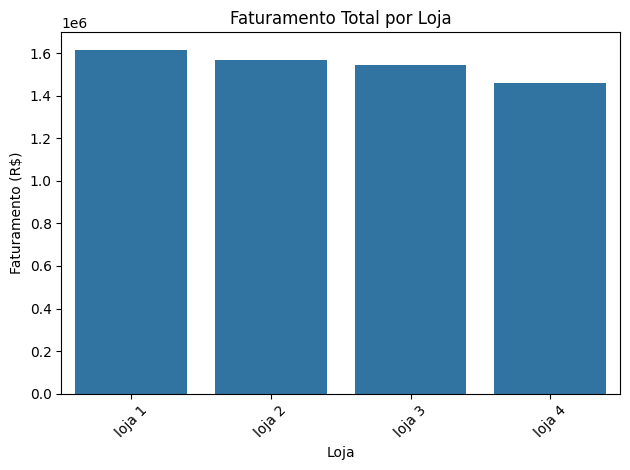

In [68]:
faturamento_por_loja = dados.groupby('loja')['Faturamento'].sum().sort_values(ascending=False)

sns.barplot(x=faturamento_por_loja.index, y=faturamento_por_loja.values)
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Gráfico 2 – Categorias mais vendidas (pizza)

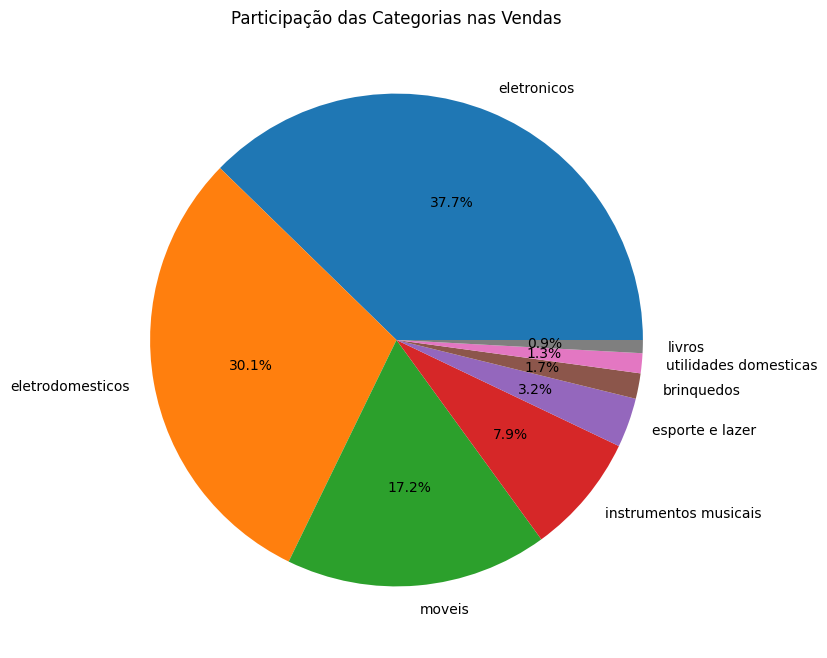

In [69]:
vendas_categoria = dados.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
vendas_categoria.plot.pie(autopct='%1.1f%%')
plt.title('Participação das Categorias nas Vendas')
plt.ylabel('')
plt.show()


📊 Gráfico 3 – Avaliação média por loja

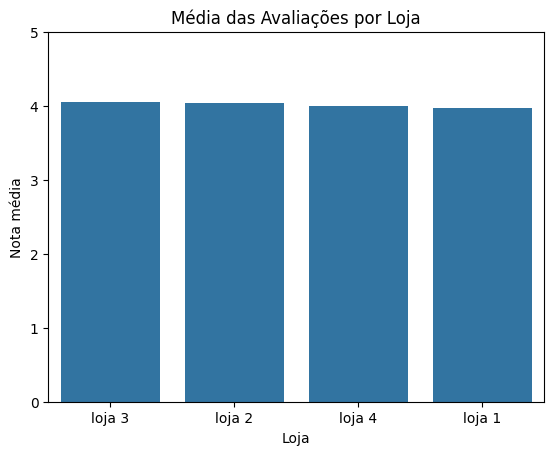

In [70]:
avaliacoes_medias = dados.groupby('loja')['Avaliação da compra'].mean().sort_values(ascending=False)

sns.barplot(x=avaliacoes_medias.index, y=avaliacoes_medias.values)
plt.title('Média das Avaliações por Loja')
plt.ylabel('Nota média')
plt.xlabel('Loja')
plt.ylim(0, 5)
plt.show()
